# 🧠 Exploratory Data Analysis on the Stroke Prediction Dataset
This notebook embarks on a data-driven exploration of the Kaggle Stroke Prediction dataset. Our primary mission is to dissect a rich collection of patient information—spanning demographic details, lifestyle habits, and key clinical metrics—to identify the patterns that signal stroke risk.

The main objectives of this analysis are:
- **Insight**: First, We will visualize the data to uncover the statistical relationships between factors like age, hypertension, and smoking status and the likelihood of a stroke.
- **Discovery**: we'll then probe the dataset's structure and quality, addressing any inconsistencies or missing values. 
- **Preparation**: Finally, we will meticulously clean and transform the raw data into a polished, model-ready format, setting the stage for building an effective predictive tool.


## 📦 Importing Required Libraries

The necessary Python packages for handling data, generating visualizations, and performing statistical tests are loaded.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Settings
sns.set(style="whitegrid")
%matplotlib inline

## 📥 Loading and Initial Inspection

The dataset is loaded, and we examine its dimensions (rows and columns). Additionally, we inspect the initial rows to get an idea of the structure and data types.

In [3]:
# Load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the dataframe
print("\nDataset Info:")
df.info()

# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Dataset Info:
<class 'pand

# Initial Findings:

The dataset has 5110 entries and 12 columns.

The bmi column has missing values (5110 - 4909 = 201 missing values).

age, avg_glucose_level, and bmi are numerical (float64), while the rest are categorical (object) or integer flags.

The id column is just an identifier and should be dropped before modeling.

## 📊 Exploratory Data Analysis (EDA)

## 🎯 Analyzing the Target Variable (stroke)

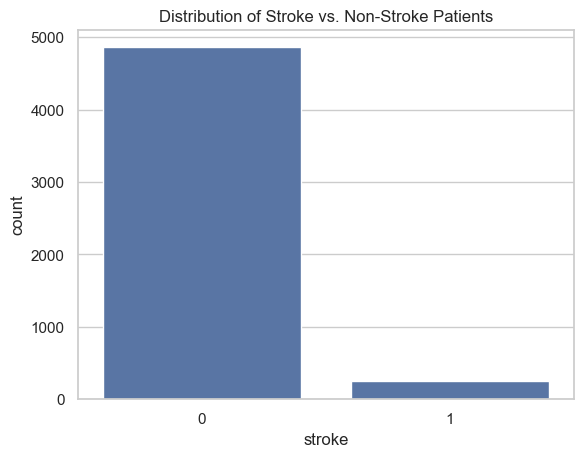

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [5]:
# Distribution of the target variable
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke vs. Non-Stroke Patients')
plt.show()

print(df['stroke'].value_counts(normalize=True) * 100)

## Key Finding:

Severe Class Imbalance:

About 95% of the data belongs to people who did not have a stroke (stroke=0).

Only about 5% of the data belongs to people who had a stroke (stroke=1).


## 📉Univariate Analysis 

## Numerical Features:


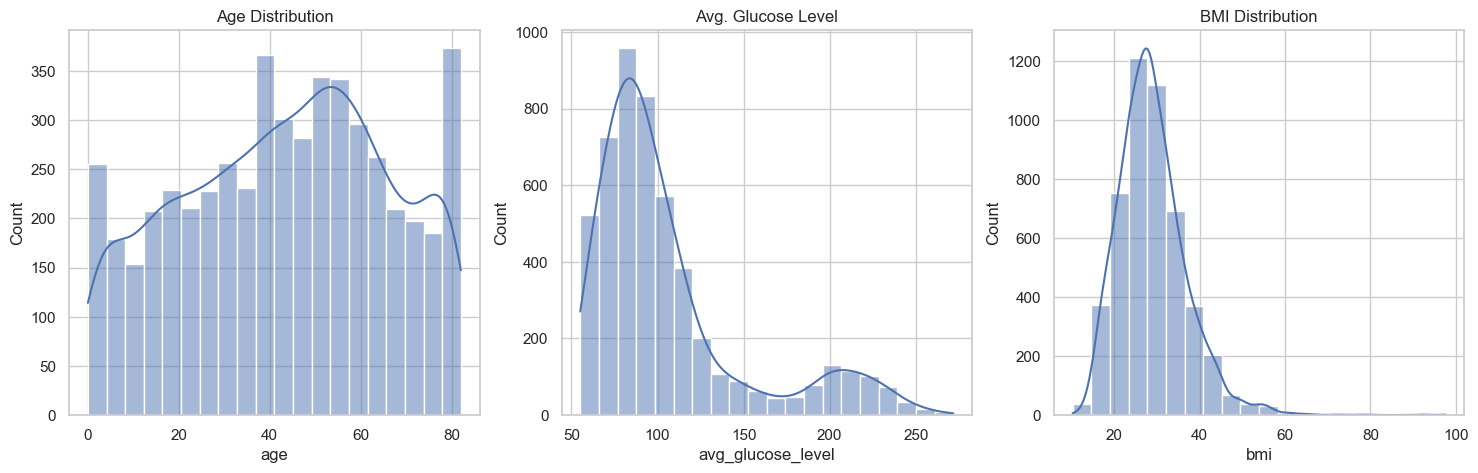

In [6]:
# Histograms for numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0]).set_title('Age Distribution')
sns.histplot(df['avg_glucose_level'], bins=20, kde=True, ax=axes[1]).set_title('Avg. Glucose Level')
sns.histplot(df['bmi'], bins=20, kde=True, ax=axes[2]).set_title('BMI Distribution')
plt.show()

# Observations:

Age: The age distribution is fairly uniform, with more people in the older age groups.

Avg. Glucose Level: The distribution is right-skewed. Most people have normal glucose levels, but there's a long tail of higher values.

BMI: The distribution looks roughly normal but is also slightly right-skewed.

## Categorical Features:

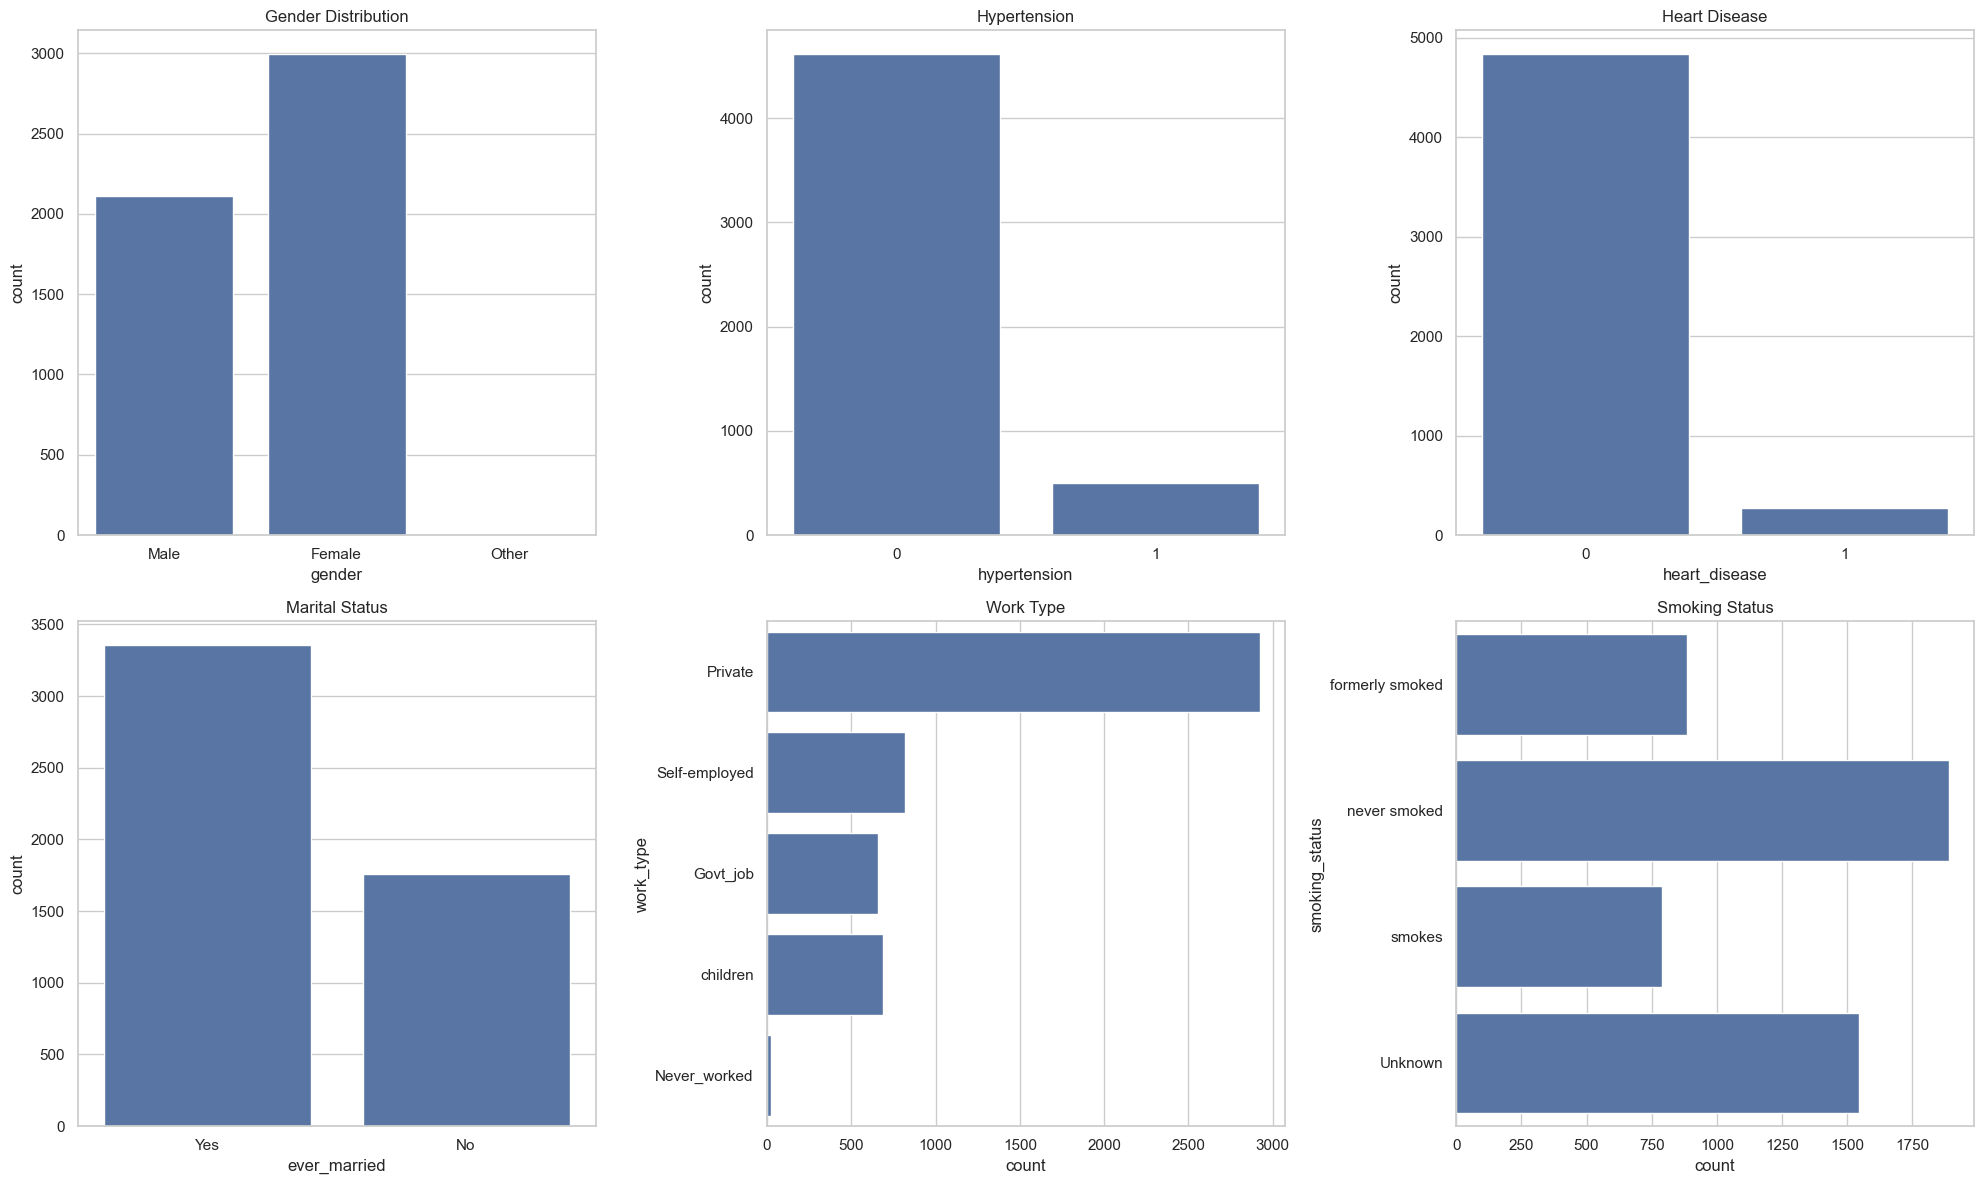

In [7]:
# Count plots for categorical features
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
sns.countplot(x='gender', data=df, ax=axes[0, 0]).set_title('Gender Distribution')
sns.countplot(x='hypertension', data=df, ax=axes[0, 1]).set_title('Hypertension')
sns.countplot(x='heart_disease', data=df, ax=axes[0, 2]).set_title('Heart Disease')
sns.countplot(x='ever_married', data=df, ax=axes[1, 0]).set_title('Marital Status')
sns.countplot(y='work_type', data=df, ax=axes[1, 1]).set_title('Work Type') # y-axis for better labels
sns.countplot(y='smoking_status', data=df, ax=axes[1, 2]).set_title('Smoking Status')
plt.tight_layout()
plt.show()

## Observations:
The dataset has slightly more females than males.

Most patients do not have hypertension or heart disease.

Most patients are married and live in urban areas.

The majority work in the private sector.

"Never smoked" is the most common smoking status, but "Unknown" is also a large category.

## 📈 Bivariate Analysis (Relationship of features with stroke)

## Age

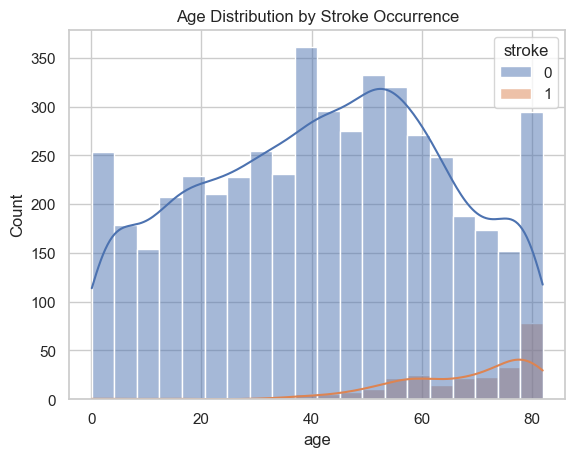

In [8]:
sns.histplot(data=df, x='age', hue='stroke', kde=True)
plt.title('Age Distribution by Stroke Occurrence')
plt.show()

The risk of stroke increases dramatically with age. The vast majority of stroke cases occur in people over 50. Age is the strongest predictor in this dataset.

## Hypertension & Heart Disease

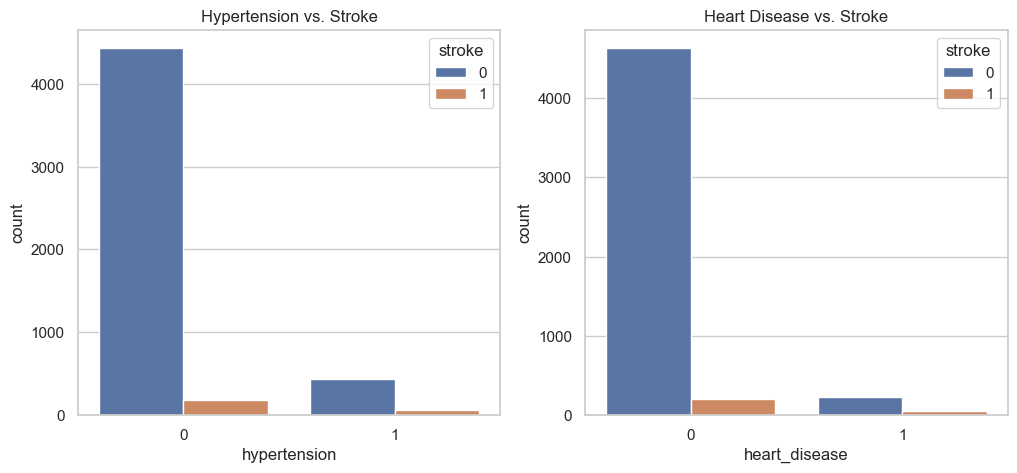

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(ax=axes[0], x='hypertension', hue='stroke', data=df)
axes[0].set_title('Hypertension vs. Stroke')
sns.countplot(ax=axes[1], x='heart_disease', hue='stroke', data=df)
axes[1].set_title('Heart Disease vs. Stroke')
plt.show()

The stroke rate is clearly higher in people with hypertension or heart disease. These are also significant risk factors.

## Average Glucose Level

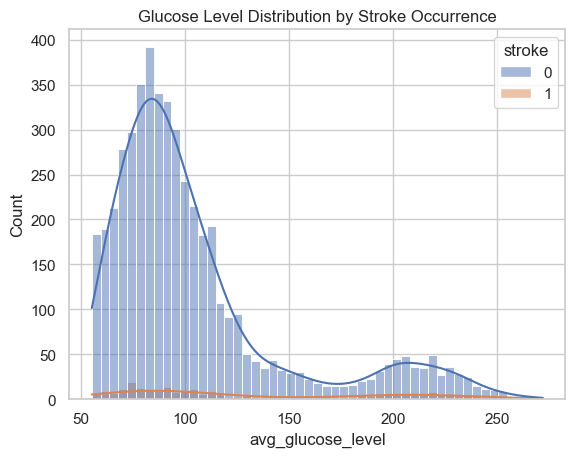

In [10]:
sns.histplot(data=df, x='avg_glucose_level', hue='stroke', kde=True)
plt.title('Glucose Level Distribution by Stroke Occurrence')
plt.show()

People who had a stroke seem to have two distinct distributions: one in the normal range and another in a very high range (diabetes). In general, higher glucose levels are associated with a higher risk of stroke.

## Body Mass Index (BMI)

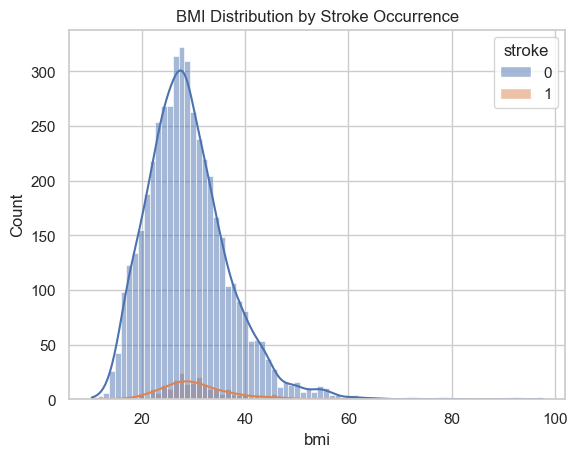

In [11]:
sns.histplot(data=df, x='bmi', hue='stroke', kde=True)
plt.title('BMI Distribution by Stroke Occurrence')
plt.show()

The relationship between BMI and stroke is not as clear as with age or glucose, but it appears that individuals with a BMI in the 25-35 range (overweight and obese) are at a slightly higher risk. The correlation is weaker.

## Marital Status & Work Type

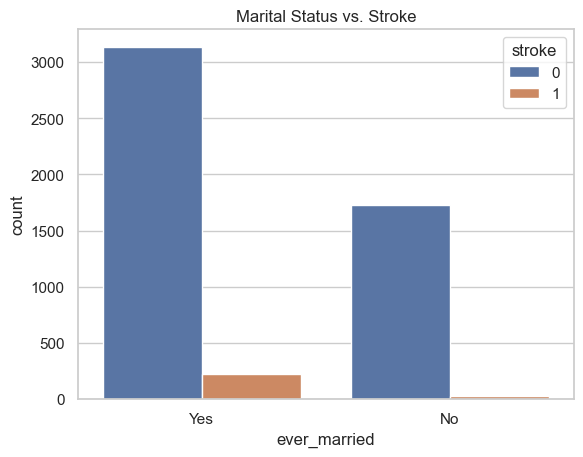

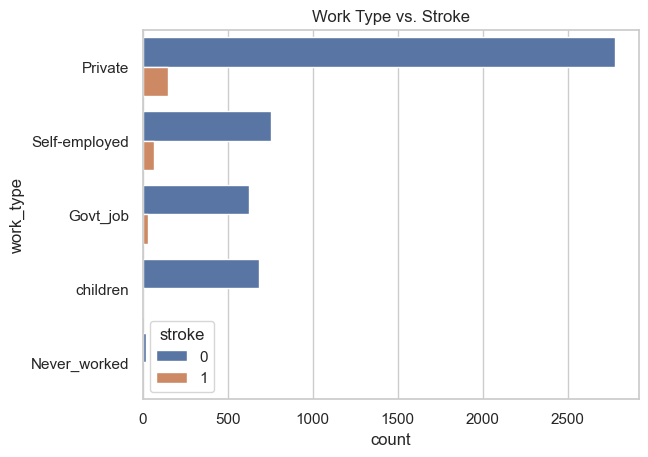

In [12]:
sns.countplot(x='ever_married', hue='stroke', data=df)
plt.title('Marital Status vs. Stroke')
plt.show()

sns.countplot(y='work_type', hue='stroke', data=df)
plt.title('Work Type vs. Stroke')
plt.show()

The stroke rate is significantly higher in married individuals. (This could be correlated with age, as older people are more likely to be married).

The self-employed and private sector workers have the highest number of stroke cases.

## Smoking Status

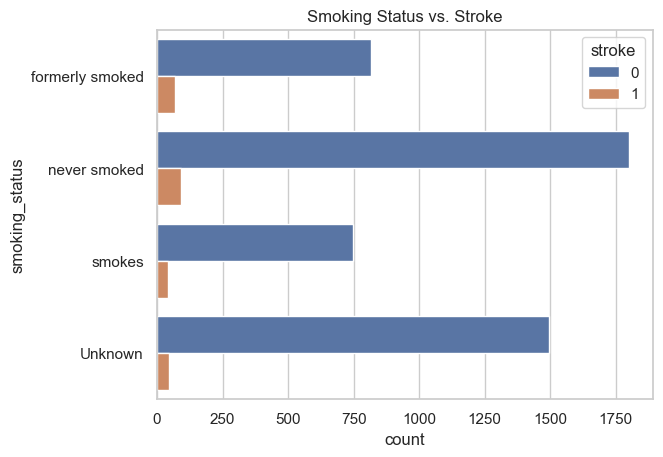

In [13]:
sns.countplot(y='smoking_status', hue='stroke', data=df)
plt.title('Smoking Status vs. Stroke')
plt.show()

Individuals who "formerly smoked" have the highest stroke rate among the groups, followed by those who currently "smoke". This suggests that quitting smoking does not eliminate the risk.

The "Unknown" category is large, which presents a challenge for analysis.


## 🧼 Preprocessing and Preparing Data for Modeling

## 1. Dropping Unnecessary Columns


The id column provides no predictive value and should be removed.


In [14]:
# Drop the 'id' column
df.drop('id', axis=1, inplace=True)

## 2. Handling Missing Values


The bmi column has 201 null values. Dropping these rows would mean losing valuable data. A better approach is imputation.

Since the bmi distribution is slightly right-skewed, using the median is a better choice than the mean, as the median is more robust to outliers.

In [15]:
# Impute missing BMI values with the median
bmi_median = df['bmi'].median()
df['bmi'].fillna(bmi_median, inplace=True)

# Double-check for any remaining missing values
print("Number of missing values after imputation:")
print(df.isnull().sum())

Number of missing values after imputation:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7672\1047036421.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(bmi_median, inplace=True)


Now our dataset has no missing values.


## 3. Handling Outliers


There are outliers in the avg_glucose_level and bmi columns. In this specific medical context, extreme values (like a very high glucose level) might be the very signals that predict a stroke. Therefore, we will not remove them for now. However, we should use scaling techniques that are robust to outliers (like RobustScaler) or models that are less sensitive to them (like tree-based models).


## 4. Encoding Categorical Variables


A minor issue: The gender column has one "Other" value. Since there is only one sample, it cannot form a meaningful pattern for the model and is best removed.


In [16]:
# Remove the row with 'Other' gender
df = df[df['gender'] != 'Other']

# Use One-Hot Encoding to convert categorical variables
# This method creates a new binary (0 or 1) column for each category,
# avoiding the creation of an artificial order.
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# drop_first=True is used to avoid multicollinearity by dropping one category from each feature (e.g., if gender_Male is 0, we know the gender is Female)

## 💾 Export of the preprocessed dataset

In [17]:
df_processed.to_csv('stroke_dataset.csv', encoding='utf-8', index=False)

## 📝 Summary of Preparation Steps:

Imputed Missing Values: Filled bmi NaNs with the median.

Removed "Other" Gender: Dropped one row that would be problematic.

Dropped Identifier: Removed the id column.

Encoded Categorical Data: Converted all object columns to numerical format using one-hot encoding.

## 🔰Conclusion from the Analysis

## 1. Key Risk Factors Identified: 
The analysis confirms strong correlations between the likelihood of a stroke and several key factors. Age is the most dominant predictor, with stroke patients being significantly older. Hypertension and heart disease are also powerful indicators, dramatically increasing a patient's risk. Additionally, higher average glucose levels are associated with a greater incidence of stroke.

## 2. Critical Class Imbalance: 
The most significant characteristic of this dataset is its severe class imbalance. Approximately 95% of the data points belong to the "no stroke" class, while only 5% represent the "stroke" class. This imbalance means that a naive model could achieve 95% accuracy by simply predicting "no stroke" every time, making it completely useless for its intended purpose. This finding dictates our entire modeling and evaluation strategy

## 3. Data Quality and Preparation: 
The initial dataset was of good quality but required essential preprocessing. We successfully addressed missing values in the bmi column by imputing the median, handled a minor categorical issue ('Other' gender), and transformed all categorical features into a numerical format using one-hot encoding. Finally, we scaled the numerical features to ensure that algorithms sensitive to feature magnitude (like Logistic Regression or SVM) can perform optimally.

## ⏭️Next Steps: A Roadmap for Model Building

With the preprocessed data, the following steps provide a clear path to developing a reliable stroke prediction model.

1. Data Splitting (Train-Test Split)
2. Handling the Class Imbalance
3. Model Selection and Training
4. Model Evaluation on the Test Set
5. Hyperparameter Tuning